In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#Mouting the drive to load a simple data set stored on the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


train_data = pd.read_csv("/content/gdrive/My Drive/train.csv",sep=',')
test_data = pd.read_csv("/content/gdrive/My Drive/test.csv",sep=',')

train_data = train_data.dropna(subset = ["Age"])
test_data = test_data.dropna(subset = ["Age"])
train_data['Sex']=train_data['Sex'].apply(lambda x: 1 if x=='female' else 0)
train_data.head()

# Standard Scaler )

def standard_scaler(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    scaled_data = (data - mean) / std_dev
    return scaled_data




train_data.loc[:, ['Age','Fare']] = standard_scaler(train_data[['Age', 'Fare']])


# Split the data into training and testing sets
train_data_set, test_data_set = train_test_split(train_data, test_size=0.2, random_state=42)

training_data,training_target = train_data_set[['Pclass', 'Age', 'Fare','Sex' ]], train_data_set["Survived"]
testing_data,testing_target = test_data_set[['Pclass', 'Age', 'Fare','Sex', ]], test_data_set["Survived"]


# Assuming a range of K values (e.g., from 1 to 50)
k_values = range(1, 50)
k_value = 0
highest_accuracy_DT = 0
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(training_data, training_target)
    testing_data_predict = knn_classifier.predict(testing_data)
    print("For the value of k  = ",k, " the accuracy score is: ", accuracy_score(testing_target,testing_data_predict))
    accuracy_scores.append(accuracy_score)

    if accuracy_score(testing_target,testing_data_predict) > highest_accuracy_DT:
          highest_accuracy_DT = accuracy_score(testing_target,testing_data_predict)
          k_value = k

print("The KNN with the highest accuracy ",highest_accuracy_DT, "has the following parameter: \k = ", k_value)


#Run 5-fold cross validations

from sklearn.model_selection import cross_val_score

knn_classifier = KNeighborsClassifier(n_neighbors=k_value, weights = 'distance')  # Use the best K value you found
cross_val_scores = cross_val_score(knn_classifier, training_data,training_target, cv=5)

# Report mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cross_val_scores)
std_cv_score = np.std(cross_val_scores)
print("mean_cv_score: ",mean_cv_score, "\std_cv_score: ", std_cv_score)

# Evaluate using confusion matrix

best_knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
best_knn_classifier.fit(training_data, training_target)
testing_data_predict_best = best_knn_classifier.predict(testing_data)

conf_matrix = confusion_matrix(testing_target, testing_data_predict_best)
c_r = classification_report(testing_target,testing_data_predict_best)
a_s = accuracy_score(testing_target,testing_data_predict_best)

# Compare observed value and Predicted value
print(conf_matrix)
print(c_r)
print(a_s)





For the value of k  =  1  the accuracy score is:  0.7412587412587412
For the value of k  =  2  the accuracy score is:  0.7622377622377622
For the value of k  =  3  the accuracy score is:  0.7412587412587412
For the value of k  =  4  the accuracy score is:  0.7902097902097902
For the value of k  =  5  the accuracy score is:  0.7902097902097902
For the value of k  =  6  the accuracy score is:  0.8111888111888111
For the value of k  =  7  the accuracy score is:  0.7762237762237763
For the value of k  =  8  the accuracy score is:  0.7902097902097902
For the value of k  =  9  the accuracy score is:  0.7622377622377622
For the value of k  =  10  the accuracy score is:  0.7692307692307693
For the value of k  =  11  the accuracy score is:  0.7762237762237763
For the value of k  =  12  the accuracy score is:  0.7762237762237763
For the value of k  =  13  the accuracy score is:  0.7552447552447552
For the value of k  =  14  the accuracy score is:  0.7552447552447552
For the value of k  =  15  th

<Axes: >

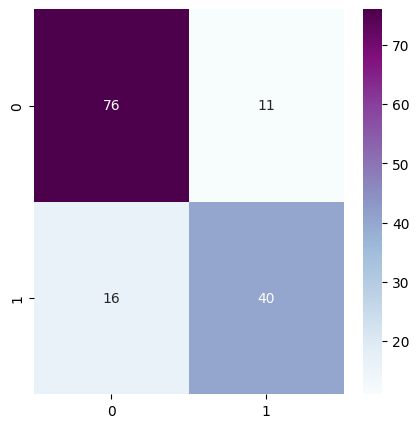

In [ ]:


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap="BuPu")